# Baseline model : Linear Regression

## Results

#### close_NVDA_lag_1
- **Mean Squared Error**: 7.941503432243339
- **R² Score**: 0.9959860818141827
- **Mean Absolute Error**: 1.7347503065624341
- verry good prediction


#### close_NVDA_lag_1 & oil
- **Mean Squared Error**: 7.937821845271834
- **R² Score**: 0.9959879426191328
- **Mean Absolute Error**: 1.733686242138444
- minimial better than before, but almost no change


#### close_NVDA_lag_1, 3, 5, 10 & oil
- **Mean Squared Error**: 7.999938877802877
- **R² Score**: 0.9959565464623908
- **Mean Absolute Error**: 1.7459020723640264
- worse because of multicoloniality



test


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [7]:
df = pd.read_csv("../data/processed_combined_data.csv")

In [8]:
df.head()

[col for col in df.columns if 'close_NVDA' in col]
# df['close_NVDA'].isna().sum()    

['close_NVDA',
 'close_NVDA_diff',
 'close_NVDA_rolling_mean_5',
 'close_NVDA_rolling_std_5',
 'close_NVDA_rolling_mean_20',
 'close_NVDA_rolling_std_20',
 'close_NVDA_lag_1',
 'close_NVDA_lag_3',
 'close_NVDA_lag_5',
 'close_NVDA_lag_10',
 'close_NVDA_trend',
 'close_NVDA_seasonal',
 'close_NVDA_residual',
 'close_NVDA_log_return',
 'close_NVDA_diff_second_diff',
 'close_NVDA_rolling_mean_5_log_return',
 'close_NVDA_rolling_std_5_log_return',
 'close_NVDA_rolling_mean_20_log_return',
 'close_NVDA_rolling_std_20_log_return',
 'close_NVDA_lag_1_log_return',
 'close_NVDA_lag_3_log_return',
 'close_NVDA_lag_5_log_return',
 'close_NVDA_lag_10_log_return',
 'close_NVDA_trend_log_return',
 'close_NVDA_residual_second_diff']

In [9]:
X = df[['close_NVDA_lag_1']]  # Feature last day
X2 = df[['close_NVDA_lag_1', 'oil']]  #Feature last day and oil
X3 = df[['close_NVDA_lag_1', 'oil','close_NVDA_lag_3', 'close_NVDA_lag_5', 'close_NVDA_lag_10' ]]  #Feature last day and oil
y = df['close_NVDA']    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, shuffle=False)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

model2 = LinearRegression()
model2.fit(X_train2, y_train2)

model3 = LinearRegression()
model3.fit(X_train3, y_train3)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test2)
y_pred3 = model3.predict(X_test3)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse2 = mean_squared_error(y_test2, y_pred2)
mae2 = mean_absolute_error(y_test2, y_pred2)
r22 = r2_score(y_test2, y_pred2)

mse3 = mean_squared_error(y_test3, y_pred3)
mae3 = mean_absolute_error(y_test3, y_pred3)
r23 = r2_score(y_test3, y_pred3)

print("-------close_NVDA_lag_1-------")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"Mean Absolute Error: {mae}")
print("")
print("-------close_NVDA_lag_1 & oil-------")
print(f"Mean Squared Error 2: {mse2}")
print(f"R2 Score 2: {r22}")
print(f"Mean Absolute Error: {mae2}")
print("")
print("-------close_NVDA_lag_1, 3, 5, 10 & oil-------")
print(f"Mean Squared Error 3: {mse3}")
print(f"R2 Score 3: {r23}")
print(f"Mean Absolute Error 3: {mae3}")

-------close_NVDA_lag_1-------
Mean Squared Error: 7.941503432243339
R2 Score: 0.9959860818141827
Mean Absolute Error: 1.7347503065624341

-------close_NVDA_lag_1 & oil-------
Mean Squared Error 2: 7.937821845271834
R2 Score 2: 0.9959879426191328
Mean Absolute Error: 1.733686242138444

-------close_NVDA_lag_1, 3, 5, 10 & oil-------
Mean Squared Error 3: 7.999938877802877
R2 Score 3: 0.9959565464623908
Mean Absolute Error 3: 1.7459020723640264


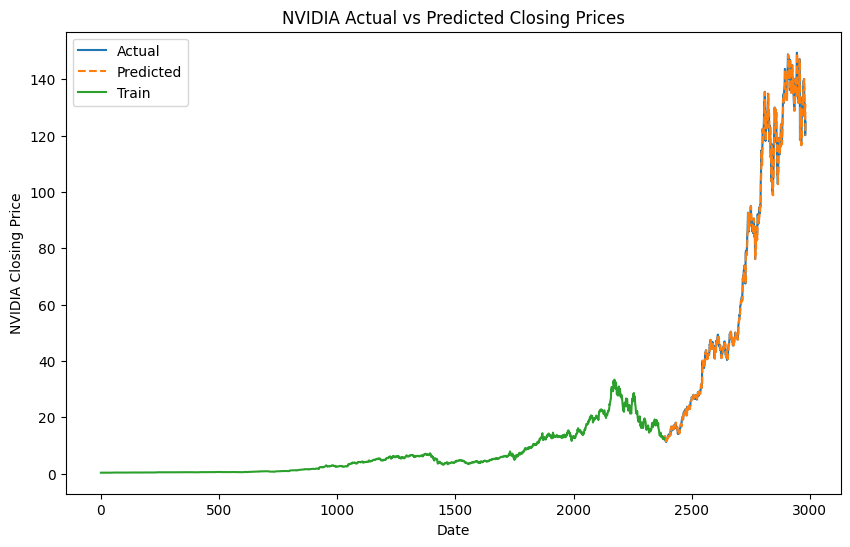

In [11]:
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.plot(y_train.index, y_train, label='Train')
plt.xlabel('Date')
plt.ylabel('NVIDIA Closing Price')
plt.title('NVIDIA Actual vs Predicted Closing Prices')
plt.legend()
plt.show()

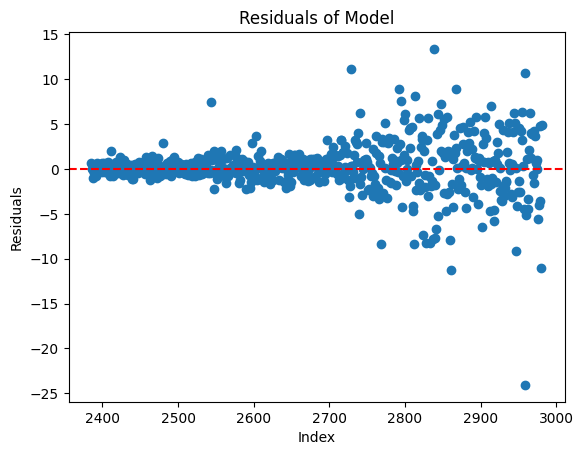

In [12]:
residuals = y_test - y_pred
plt.scatter(y_test.index, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals of Model')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.show()